In [13]:
from sklearn import preprocessing, model_selection
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from numpy import genfromtxt

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Chooses the best hyperparameter configuration for each experiment

In this stage we will evaluate based on the defined metrics, which combination of hyperparameters had the best performance for each experiment

In [14]:
experiments = [dI for dI in os.listdir('../cross_validation') if os.path.isdir(os.path.join('../cross_validation',dI))]

# best_models = []
cross_validation_metrics = pd.read_csv('../cross_validation/cross_validation_metrics.csv')
cross_validation_metrics = cross_validation_metrics.sort_values(['average_acc', 'average_precision', 'average_recall'], ascending=[False, False, False])
# best_model = training_metrics.iloc[0]
# best_model["experiment"] = experiment

# best_models.append(best_model)
    
best_models = pd.DataFrame(cross_validation_metrics).reset_index().drop(columns=['index'])
#best_models = best_models[['experiment', 'units', 'learning_rate', 'momentum', 'decay', 'activation_function', 'acc', 'loss', 'mae', 'mse', 'precision', 'recall', 'fs_score']] 
best_models = best_models.sort_values(['experiment'], ascending=True)
best_models

,experiment,model_name,units,learning_rate,momentum,decay,activation_function,average_acc,acc_std_deviation,average_precision,precision_std_deviation,average_recall,recall_std_deviation,average_fs_score,fs_score_std_deviation,average_precision_curve,roc_auc_rf
0,mean_body,model_262,75,0.0100,0.0100,0.0100,relu,0.511652,0.019369,0.515596,0.026376,0.652726,0.211999,0.565947,0.067726,0.508931,0.512687
2,mean_title,model_472,35,0.0100,0.0001,0.0001,relu,0.507155,0.002024,0.535063,0.027088,0.221213,0.206197,0.280832,0.209412,0.506208,0.507428
4,mean_title_subtitle,model_448,35,0.0100,0.0100,0.0001,relu,0.502044,0.001735,0.502486,0.001950,0.884895,0.053198,0.640685,0.012382,0.502445,0.500393
5,pmean_body,model_345,75,0.0001,0.1000,0.1000,relu,0.485282,0.002313,0.486642,0.008279,0.492128,0.132138,0.485461,0.070077,0.494943,0.484910
1,pmean_title,model_536,35,0.0001,0.1000,0.0001,relu,0.509403,0.000578,0.509037,0.001355,0.634015,0.239993,0.554616,0.098152,0.506056,0.507506
3,pmean_title_subtitle,model_224,75,0.1000,0.0010,0.0001,relu,0.506337,0.010696,0.510283,0.008516,0.376728,0.125269,0.428108,0.086794,0.505935,0.507157


In [15]:
# formatted_best_models = best_models

# best_models_params = pd.DataFrame()
# best_models_params["experiment"] = best_models["experiment"]
# best_models_params["units"] = best_models["units"]
# best_models_params["learning_rate"] = best_models["learning_rate"]
# best_models_params["momentum"] = best_models["momentum"]
# best_models_params["decay"] = best_models["decay"]
# best_models_params["activation_function"] = best_models["activation_function"]

# best_models_results = pd.DataFrame()
# best_models_results["experiment"] = best_models["experiment"]
# best_models_results["acc"] = best_models["acc"] * 100
# best_models_results["precision"] = best_models["precision"] * 100
# best_models_results["recall"] = best_models["recall"] * 100
# best_models_results["fs_score"] = best_models["fs_score"] * 100
# best_models_results = formatted_best_models.round(2)

# best_models_params.to_csv("../data-analysis/best_models_params.csv", index= False, encoding='utf-8')
# best_models_results.to_csv("../data-analysis/best_models_results.csv", index= False, encoding='utf-8')

## Plots the Precision-Recall curve of the best models

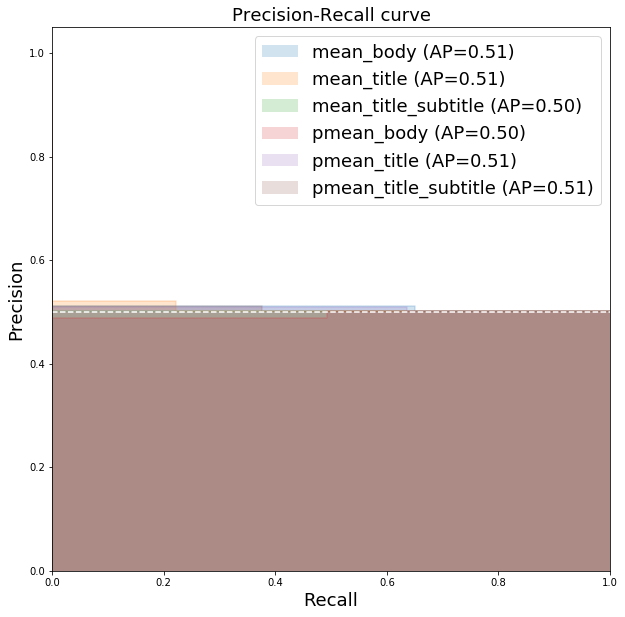

In [17]:
for index, model in best_models.iterrows(): 
    true_y = genfromtxt('../cross_validation/'+ model["experiment"] +'/true_y.csv', delimiter=',')
    probas_pred = genfromtxt('../cross_validation/'+ model["experiment"] + '/predicted_y.csv', delimiter=',')

    average_precision = average_precision_score(true_y, probas_pred)
    precision, recall, _ = precision_recall_curve(true_y, probas_pred)

    plt.step(recall, precision, alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, 
             label=model["experiment"] +' (AP={0:0.2f})'.format(average_precision))
    plt.xlabel('Recall', fontsize=18)
    plt.ylabel('Precision', fontsize=18)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve', fontsize=18)
plt.plot([0, 1], [0.5, 0.5], color='white', linestyle='--')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.legend(loc='upper right', prop={'size': 18})
plt.savefig('../data-analysis/precision_recall_curve.png', dpi=300)
plt.show()

## Plots the ROC Curve of the models

/Users/gcarvs/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


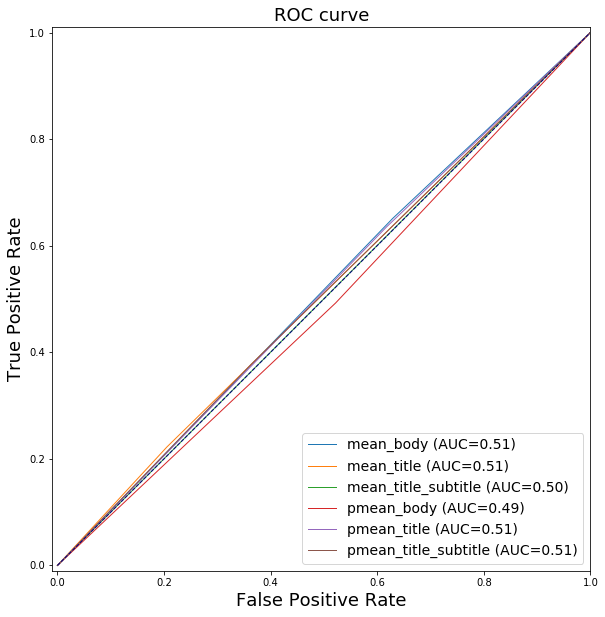

In [19]:
for index, model in best_models.iterrows(): 
    true_y = genfromtxt('../cross_validation/'+ model["experiment"] +'/true_y.csv', delimiter=',')
    probas_pred = genfromtxt('../cross_validation/'+ model["experiment"] + '/predicted_y.csv', delimiter=',')
    
    fpr_rf, tpr_rf, _ = roc_curve(true_y, probas_pred)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} (AUC={:0.2f})'.format(model['experiment'],roc_auc_rf))
    #plt.plot(fpr_rf, tpr_rf, lw=1)

plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', prop={'size': 14})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)


plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

plt.axes().set_aspect('equal')
plt.savefig('../data-analysis/roc_curve.png', dpi=300)
plt.show()